Welcome, using subway data provided by the MTA we will analyze where on a map the most popular subway systems are, and then determine the best locations for future subway lines based on pre existing infrastructure.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

df = pd.read_excel('data\original_Data\mta_subway_tables.xlsx', sheet_name='Subway Rank')
df = df.iloc[:, :-4]
df.drop(['CCYY','STAID'], axis=1, inplace=True)

df.tail()

<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
C:\Users\david\AppData\Local\Temp\ipykernel_16984\3171106547.py:6: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_excel('data\original_Data\mta_subway_tables.xlsx', sheet_name='Subway Rank')


,STATION,SEGMENT,SECTOR,BOROUGH,AVGWKDRIDER,AVGSATRIDER,AVGSUNRIDER,AVGWKND,ANN_RID,Wkdy Rank,Wknd Rank,Annual Rank
420,"Court Sq (E,G,M,7)",Queens Transfer,Queens,Queens,17116,10681,8360,19041,5381184,47.0,46.0,48.0
421,"Sutphin Blvd-Archer Av-JFK Airport (E,J,Z)",Queens Transfer,Queens,Queens,19068,10868,8951,19819,5941974,35.0,43.0,34.0
422,"Jamaica Center-Parsons-Archer (E,J,Z)",Queens Transfer,Queens,Queens,19529,7911,5839,13750,5715839,33.0,85.0,39.0
423,OMNYSystemwide Adjustment,OMNYSystemwide Adjustment,OMNYSystemwide Adjustment,OMNYSystemwide Adj.,0,0,0,0,0,424.0,424.0,424.0
424,NaN,NaN,NaN,NaN,3625326,2356528,1880767,4237295,1151998158,NaN,NaN,NaN


In [25]:
def remove_train(x):
    x = str(x)
    lst = x.split('(')
    return lst[0].strip()

df['STATION'] = df['STATION'].apply(remove_train)
only_station = df['STATION']


,STATION,SEGMENT,SECTOR,BOROUGH,AVGWKDRIDER,AVGSATRIDER,AVGSUNRIDER,AVGWKND,ANN_RID,Wkdy Rank,Wknd Rank,Annual Rank
420,Court Sq,Queens Transfer,Queens,Queens,17116,10681,8360,19041,5381184,47.0,46.0,48.0
421,Sutphin Blvd-Archer Av-JFK Airport,Queens Transfer,Queens,Queens,19068,10868,8951,19819,5941974,35.0,43.0,34.0
422,Jamaica Center-Parsons-Archer,Queens Transfer,Queens,Queens,19529,7911,5839,13750,5715839,33.0,85.0,39.0
423,OMNYSystemwide Adjustment,OMNYSystemwide Adjustment,OMNYSystemwide Adjustment,OMNYSystemwide Adj.,0,0,0,0,0,424.0,424.0,424.0
424,nan,NaN,NaN,NaN,3625326,2356528,1880767,4237295,1151998158,NaN,NaN,NaN


We now have the data loaded, we removed a couple of columns which we did not need and now we can use this modified data frame to graph important data and later use the geopandas library to map the locations out.

<Axes: xlabel='BOROUGH', ylabel='ANN_RID'>

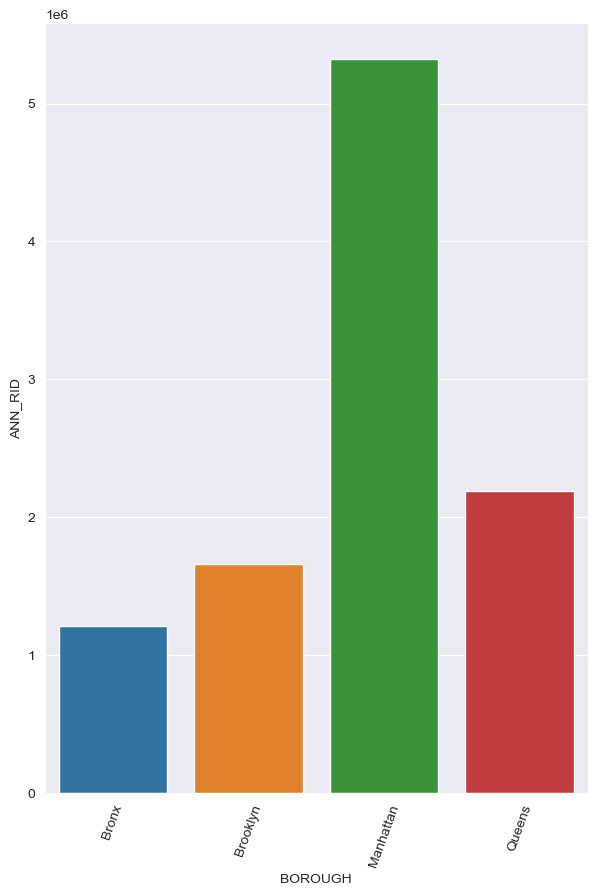

In [15]:
df_annual = df.groupby('BOROUGH')['ANN_RID'].mean().reset_index()

sns.set_style("darkgrid")
plt.figure(figsize=(7,10))
plt.xticks(rotation=70)

sns.barplot(data=df_annual[df_annual['BOROUGH'] != 'OMNYSystemwide Adj.'], x='BOROUGH', y='ANN_RID', hue='BOROUGH')

<Axes: xlabel='BOROUGH', ylabel='AVGWKDRIDER'>

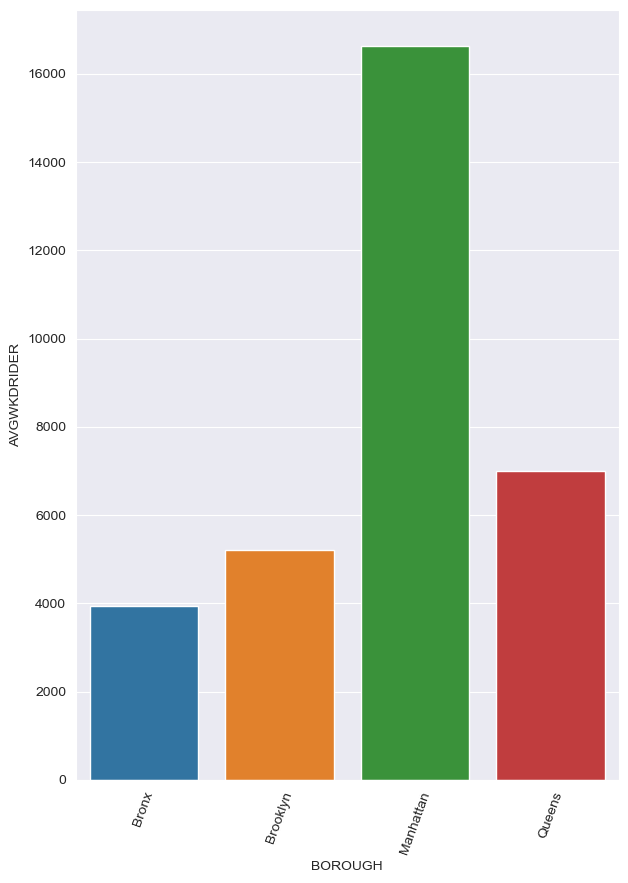

In [16]:
df_weekday = df.groupby('BOROUGH')['AVGWKDRIDER'].mean().reset_index()
plt.figure(figsize=(7,10))
plt.xticks(rotation=70)
sns.barplot(data=df_weekday[df_weekday['BOROUGH'] != 'OMNYSystemwide Adj.'], x='BOROUGH', y='AVGWKDRIDER', hue='BOROUGH')

<Axes: xlabel='BOROUGH', ylabel='AVGWKND'>

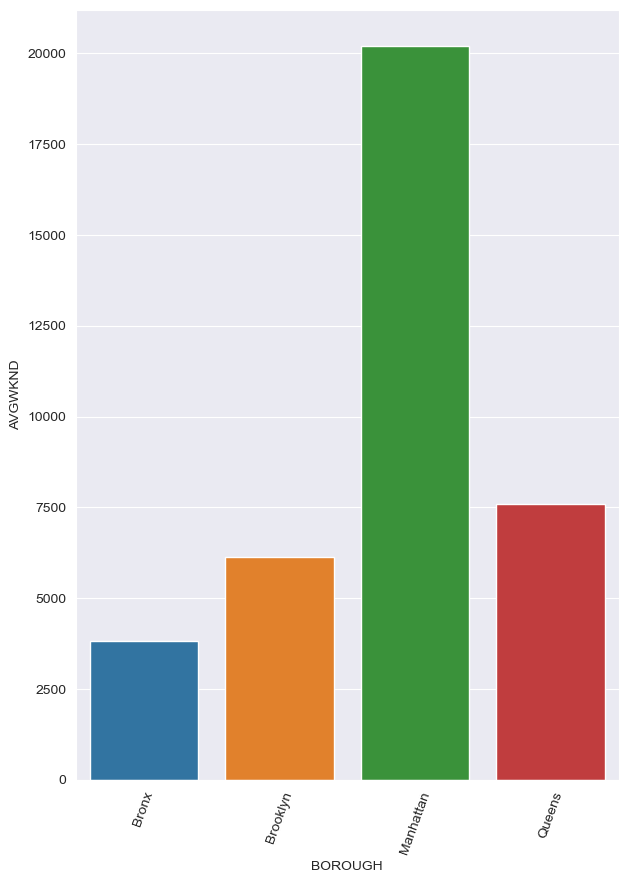

In [17]:
df_weekend = df.groupby('BOROUGH')['AVGWKND'].mean().reset_index()
plt.figure(figsize=(7,10))
plt.xticks(rotation=70)
sns.barplot(data=df_weekend[df_weekend['BOROUGH'] != 'OMNYSystemwide Adj.'], x='BOROUGH', y='AVGWKND', hue='BOROUGH')

In [27]:
df['BOROUGH'].value_counts()

,STATION,SEGMENT,SECTOR,BOROUGH,AVGWKDRIDER,AVGSATRIDER,AVGSUNRIDER,AVGWKND,ANN_RID,Wkdy Rank,Wknd Rank,Annual Rank
420,Court Sq,Queens Transfer,Queens,Queens,17116,10681,8360,19041,5381184,47.0,46.0,48.0
421,Sutphin Blvd-Archer Av-JFK Airport,Queens Transfer,Queens,Queens,19068,10868,8951,19819,5941974,35.0,43.0,34.0
422,Jamaica Center-Parsons-Archer,Queens Transfer,Queens,Queens,19529,7911,5839,13750,5715839,33.0,85.0,39.0
423,OMNYSystemwide Adjustment,OMNYSystemwide Adjustment,OMNYSystemwide Adjustment,OMNYSystemwide Adj.,0,0,0,0,0,424.0,424.0,424.0
424,nan,NaN,NaN,NaN,3625326,2356528,1880767,4237295,1151998158,NaN,NaN,NaN


Based on the info it is obvious the most popular borough is Manhattan, despite this we can see that Queens is actually the second most popular, this is an important sign since Queens has far less trains on average than Brooklyn or manhattan.

In [19]:
train_locations = pd.read_csv('data\original_data\MTA_Subway_Entrances_and_Exits_20240921.csv')
train_locations.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\david\AppData\Local\Temp\ipykernel_16984\1672705221.py:1: SyntaxWarning: invalid escape sequence '\o'
  train_locations = pd.read_csv('data\original_data\MTA_Subway_Entrances_and_Exits_20240921.csv')


,Division,Line,Borough,Station Name,Station Latitude,Station Longitude,Daytime Routes,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,entrance_georeference,station_georeference
0,IND,Rockaway,Q,Far Rockaway-Mott Av,40.603995,-73.755405,A,Door,YES,NO,YES,FULL,NaN,Beach 22nd St,Mott Ave,SW,40.604657,-73.754178,POINT (-73.754178 40.604657),POINT (-73.755405 40.603995)
1,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,NW,40.599708,-73.761959,POINT (-73.761959 40.599708),POINT (-73.761353 40.600066)
2,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599427,-73.761807,POINT (-73.761807 40.599427),POINT (-73.761353 40.600066)
3,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599670,-73.761596,POINT (-73.761596 40.59967),POINT (-73.761353 40.600066)
4,IND,Rockaway,Q,Beach 36th St,40.595398,-73.768175,A,Stair,YES,NO,YES,FULL,NaN,Beach 36th,Edgemere Ave,NE,40.595445,-73.768313,POINT (-73.768313 40.595445),POINT (-73.768175 40.595398)


In [36]:
train_latlong = train_locations.drop_duplicates(subset=['Station Latitude', 'Station Longitude', 'Station Name'])
train_latlong = train_latlong[['Station Name', 'Station Latitude', 'Station Longitude']]
train_latlong.tail()

,Station Name,Station Latitude,Station Longitude
1848,59th St,40.641362,-74.017881
1854,Bay Ridge Av,40.634967,-74.023377
1857,77th St,40.629742,-74.025510
1860,86th St,40.622687,-74.028398
1863,95th St,40.616622,-74.030876


After cleaning and modifying our data let's save it in a new location:

In [21]:
df.to_csv('data/cleaned_data/cleaned_subway_info.csv', index=False)
train_latlong.to_csv('data/cleaned_data/cleaned_subway_loc.csv', index=False)

In [22]:
train_latlong['STATION'] = train_latlong['Station Name']
train_latlong.drop('Station Name', axis=1, inplace=True)
train_merged = pd.merge(train_latlong, df, on='STATION')
train_merged.head()

,Station Latitude,Station Longitude,STATION,SEGMENT,SECTOR,BOROUGH,AVGWKDRIDER,AVGSATRIDER,AVGSUNRIDER,AVGWKND,ANN_RID,Wkdy Rank,Wknd Rank,Annual Rank
0,40.676992,-73.898654,Alabama Av,Jamaica,Other Brooklyn,Brooklyn,1205,613,468,1081,365995,406.0,396.0,405.0
1,40.865462,-73.867352,Allerton Av,White Plains Rd,Bronx,Bronx,2836,1580,1226,2806,874229,315.0,309.0,314.0
2,40.672131,-73.835812,Aqueduct Racetrack,Rockaway,Queens,Queens,557,600,488,1088,202474,417.0,395.0,415.0
3,40.668234,-73.834058,Aqueduct-North Conduit Av,Rockaway,Queens,Queens,558,211,165,376,162584,416.0,421.0,418.0
4,40.730054,-73.991070,Astor Place,Lexington Av (CBD),Valley,Manhattan,11137,9357,7161,16518,3717074,85.0,62.0,84.0


In [23]:
train_merged = train_merged[['STATION','Station Latitude','Station Longitude', 'SEGMENT', 'SECTOR', 'BOROUGH', 'AVGWKDRIDER', 'AVGWKND', 'ANN_RID']]
train_merged.to_csv('data/cleaned_data/cleaned_merged.csv')

Now we have saved our data and combined it into a small table with the columns we really need, now lets experiment and use geopandas to see our findings on a map.

In [24]:
gdf = geopandas.read_file('data\cleaned_data\cleaned_subway_loc.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\david\AppData\Local\Temp\ipykernel_16984\378622131.py:1: SyntaxWarning: invalid escape sequence '\c'
  gdf = geopandas.read_file('data\cleaned_data\cleaned_subway_loc.csv')
